In [31]:
from IPython.display import HTML

HTML('''<style>.container {width:95% !important; } </style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [32]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import norm
from scipy import optimize

from os import listdir
from os.path import isfile, join
import re
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from qpsolvers import solve_qp
import qpsolvers
from functools import reduce
from scipy import interpolate
from functools import partial

In [33]:
import sys
import os

module_path_list = ["/Users/junouyang/Jun/btc/backtester"]

for module_path in module_path_list:
    if module_path not in sys.path:
        sys.path.append(module_path)
        
import IVSmooth

In [34]:
import imp
imp.reload(IVSmooth)

<module 'IVSmooth' from '/Users/junouyang/Jun/btc/backtester/IVSmooth.py'>

In [35]:
%matplotlib notebook

## Preview data

In [36]:
# # future_df = pd.read_csv("../data3/btc/cash/BTC-24SEP21.csv", names= ['datetime','value'])
# # future_df.loc[:,'datetime'] = pd.to_datetime(future_df['datetime'])
# future_dfs = []
# syms = ['BTC-26MAR21', 'BTC-25JUN21', 'BTC-24SEP21']
# # mats = [pd.to_datetime(sss.split('-')[1], utc = True) + pd.to_timedelta('0 days 08:00:00') for sss in syms ]
# for sym in syms:
#     future_df = pd.read_csv("../data3/btc/futures/%s.csv" % sym, names= ['datetime','timestamp','last', 'last_v', 'ask_0_p', 'ask_0_v', 'bid_0_p', 'bid_0_v'])
#     future_df.loc[:,'datetime'] = pd.to_datetime(future_df['datetime'], utc = True)
#     future_df.loc[:, 'mid_0_p'] = (future_df['ask_0_v']*future_df['ask_0_p']+ future_df['bid_0_v']*future_df['bid_0_p']) / (future_df['ask_0_v'] + future_df['bid_0_v'])
#     future_df.loc[:,'sym'] = sym
#     future_df.loc[:,'mat'] = pd.to_datetime(sym.split('-')[1], utc = True) + pd.to_timedelta('0 days 08:00:00')
#     future_df = future_df.set_index(['timestamp', 'sym'])
#     future_dfs.append(future_df)
    
# future_df = pd.concat(future_dfs)
# future_df = future_df.sort_values(['timestamp', 'sym'], ascending = [True, True])


In [37]:
# future_df

In [38]:
# mypath = "../data3/btc/options"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# onlyfiles = pd.Series(onlyfiles)
# dates = [dt.date(2021,3,26), dt.date(2021,6,25), dt.date(2021,9,24)]
# datesStr = [x.strftime("%Y-%m-%d") for x in dates]
# onlyfiles = onlyfiles[onlyfiles.apply(lambda x: x.split('.')[-1] in ['put', 'call'])]
# onlyfilesFiltered = onlyfiles[onlyfiles.apply(lambda x: x.split('.')[2] in datesStr)]

# option_dfs = []
# for fileName in onlyfilesFiltered:
#     option_df = pd.read_csv("../data3/btc/options/%s" % fileName, names= ['datetime','timestamp','last', 'last_v', 'ask_0_p', 'ask_0_v', 'bid_0_p', 'bid_0_v'])
#     option_df.loc[:,'datetime'] = pd.to_datetime(option_df['datetime'], utc = False)
#     option_df.loc[:, 'mid_0_p'] = (option_df['ask_0_v']*option_df['ask_0_p']+ option_df['bid_0_v']*option_df['bid_0_p']) / (option_df['ask_0_v'] + option_df['bid_0_v'])
#     option_df.loc[:,'sym'] = '.'.join(fileName.split('.')[2:])
#     option_df.loc[:,'strike'] = float(fileName.split('.')[3])
#     option_df.loc[:,'type'] = fileName.split('.')[4]
#     option_df.loc[:,'mat'] = pd.to_datetime(fileName.split('.')[2], utc = True) + pd.to_timedelta('0 days 08:00:00')
#     option_df = option_df.set_index(['timestamp', 'sym'])
#     option_dfs.append(option_df)
    
# option_df = pd.concat(option_dfs)
# option_df = option_df.sort_values(['timestamp', 'sym'], ascending = [True, True])

In [39]:
# display(option_df.head(), option_df.tail())

## save price by time

In [40]:
# startDateTime = pd.to_datetime("2021-01-29 00:00:00", utc = True); endDateTime = pd.to_datetime("2021-01-30 00:00:00", utc = True); timedelta = pd.to_timedelta('0 days 00:00:10.00000')
# # startDateTime = pd.to_datetime("2021-01-29 00:00:00", utc = True); endDateTime = pd.to_datetime("2021-01-29 01:00:00", utc = True); timedelta = pd.to_timedelta('0 days 00:00:10.00000')

# # 2. start backtesting
# lastLoopDateTime = startDateTime - timedelta
# currentLoopDateTime = startDateTime


# results = []
# while currentLoopDateTime < endDateTime:
#     # if (DateFunctions.isBusinessDay(currentLoopDate)):
#     sys.stdout.write("\r Countdown: %s" % currentLoopDateTime.strftime("%Y-%m-%d %H:%M:%S"))
#     sys.stdout.flush()
    
    
# #     T = pd.to_datetime("2021-01-29 12:00:00", utc = True)
#     future_df_selected = future_df[(future_df['datetime'] <= currentLoopDateTime) & (future_df['datetime'] > lastLoopDateTime)].groupby(['sym']).tail(1)
#     option_df_call = option_df[option_df['type'] == 'call']
#     option_df_selected = option_df_call[(option_df_call['datetime'] <= currentLoopDateTime) & (option_df_call['datetime'] > lastLoopDateTime)].groupby(['sym']).tail(1)

#     mats = [pd.to_datetime(sss.split('-')[1], utc = True) + pd.to_timedelta('0 days 08:00:00') for sss in syms ]

#     mats_option_prices = {}
#     mats_future_prices = {}
#     for mat in mats:
# #         print("mat: ", mat)
#         strikes_options_prices = {}

#         option_df_selected_mat = option_df_selected[(option_df_selected['mat'] == mat)]
#         future_df_selected_mat = future_df_selected[(future_df_selected['mat'] == mat)]
#         strikes = option_df_selected_mat['strike'].unique().astype(int)
        

#         if (len(future_df_selected_mat) > 0):
#             future_df_selected_point = future_df_selected_mat.iloc[0]
#             for strike in strikes:
#     #             print("strike: ", strike)
#         #         mat = mats[0]
#         #         strike = strikes[0]
#                 if (len(option_df_selected_mat[(option_df_selected_mat['strike'] == strike)]) > 0):

#                     option_df_selected_point = option_df_selected_mat[(option_df_selected_mat['strike'] == strike)].iloc[0]


#                     S = future_df_selected_point['mid_0_p']
#                     K = float(strike)
#                     t = option_df_selected_point['datetime']
#                     T = option_df_selected_point['mat']
#                     tau = ((T - t).total_seconds() / (24*3600) / 365.25)
#                     r = 0.001
#                     q = r
#                     price = option_df_selected_point['mid_0_p'] * S
#             #         c = IVCalculatorBSCall()
#             #         c.calc(S = S,K=K,tau= tau, r = r ,q = q , price = price)
#                     strikes_options_prices[strike] = price
#             mats_option_prices[mat] = strikes_options_prices
#             mats_future_prices[mat] = [future_df_selected_point['mid_0_p']]
        
#     option_price_df = pd.DataFrame(mats_option_prices).sort_index()
#     option_num_NA = option_price_df.isna().sum().sum()
#     future_price_df = pd.DataFrame(mats_future_prices).sort_index()
#     future_num_NA = future_price_df.isna().sum().sum()
    
#     result = pd.DataFrame({'datetime': [currentLoopDateTime], 'future_df': [future_price_df], 'future_num_NA': [future_num_NA], 'option_df': [option_price_df], 'option_num_NA': [option_num_NA]})
#     results.append(result)
#     lastLoopDateTime = currentLoopDateTime
#     currentLoopDateTime+= timedelta
            
            


In [41]:
# result_df = pd.concat(results)
# result_df.to_pickle("./IVSurface/priceMap.pickle")

In [42]:
# result_df.head()

In [43]:
result_df = pd.read_pickle("./IVSurface/priceMap.pickle")

In [44]:
t =  pd.to_datetime("2021-01-29 07:44:10+00:00", utc = True)

example_option_df = result_df[result_df['datetime'] == t]['option_df'].values[0]
example_future_df = result_df[result_df['datetime'] == t]['future_df'].values[0]

In [45]:
f_splines = IVSmooth.smooth(example_option_df, example_future_df, t = t, r = 0.001, q = 0.001)
option_smooth_df = IVSmooth.evaluateSpline(f_splines, example_option_df)

/Users/junouyang/Jun/btc/backtester/IVSmooth.py:62: RuntimeWarning: overflow encountered in power
  return (np.log(S/K) + (r-q+np.power(sigma,2)/2)*tau)/(sigma*np.sqrt(tau))
/Users/junouyang/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:451: RuntimeWarning: some derivatives were zero
  warnings.warn(msg, RuntimeWarning)
/Users/junouyang/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/zeros.py:394: RuntimeWarning: overflow encountered in true_divide
  dp = fval[nz_der] / fder[nz_der]
/Users/junouyang/Jun/btc/backtester/IVSmooth.py:62: RuntimeWarning: invalid value encountered in true_divide
  return (np.log(S/K) + (r-q+np.power(sigma,2)/2)*tau)/(sigma*np.sqrt(tau))


QP solution: [1.74879915e+04 1.40660312e+04 1.14506474e+04 9.46599160e+03
 7.96029181e+03 6.81499196e+03 5.93936422e+03 5.26487131e+03
 4.74025498e+03 4.32689838e+03 3.99649807e+03 3.72614139e+03
 3.50102748e+03 3.30562877e+03 3.13734963e+03 2.97693982e+03
 2.81793696e+03 2.65954504e+03 2.50172334e+03 2.34448674e+03
 2.18769261e+03 2.26644474e-05 1.17522683e-05 1.04092504e-05
 7.42320473e-06 5.65747887e-06 4.18682455e-06 3.13307069e-06
 2.31054255e-06 1.75127350e-06 1.21722539e-06 1.00349175e-06
 5.13227815e-07 7.16499688e-07 6.41141437e-08 2.62013170e-08
 9.72084319e-09 1.24855807e-08 1.27360239e-08 1.08607585e-08]
QP solution: [1.56767042e+04 1.17325145e+04 8.84966396e+03 6.82902913e+03
 5.43898019e+03 4.48066149e+03 3.80545992e+03 3.30989509e+03
 2.92357459e+03 2.59989032e+03 2.30219042e+03 2.01511594e+03
 3.09181122e-05 1.73320620e-05 1.43035409e-05 9.23043612e-06
 6.13235372e-06 3.85375270e-06 2.31832482e-06 1.38663268e-06
 4.56697869e-07 2.38736304e-07]
QP solution: [1.40646163e+

<IPython.core.display.Javascript object>


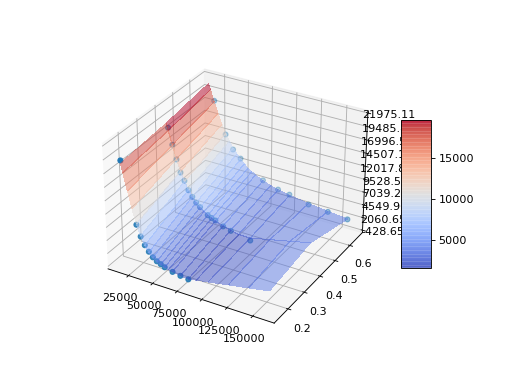

In [46]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

# example_df2= example_option_df.interpolate(method = 'spline', order=1,limit_direction = 'both')
X, Y = np.meshgrid(option_smooth_df.index, IVSmooth.TAU(t, option_smooth_df.columns))
Z = option_smooth_df.values.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.5)

x_dot, y_dot = np.meshgrid(example_option_df.index, IVSmooth.TAU(t, example_option_df.columns))
z_dot = example_option_df.values.T
ax.scatter(x_dot, y_dot, z_dot, marker='o')
    
# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()